### 批量梯度下降法

$\bigtriangledown J(\theta) =  \frac2m\cdot \left\lgroup\begin{matrix} \sum_{i=1}^{m}{({X_b^{(i)\theta - y^{(i)}}) \cdot{X_0^{(i)}} }}  \cr \sum_{i=1}^{m}{({X_b^{(i)\theta - y^{(i)}}) \cdot{X_1^{(i)}} }} \cr \sum_{i=1}^{m}{({X_b^{(i)\theta - y^{(i)}}) \cdot{X_2^{(i)}} }} \cr ... \cr \sum_{i=1}^{m}{({X_b^{(i)\theta - y^{(i)}}) \cdot{X_n^{(i)}} }} \end{matrix}\right\rgroup = \frac2m \cdot X_b^T \cdot (X_b\theta - y)$

### 随机梯度下降法

$\bigtriangledown J(\theta) =  2 \cdot \left\lgroup\begin{matrix} ({X_b^{(i)}\theta - y^{(i)}}) \cdot {X_0^{(i)}}  \cr ({X_b^{(i)}\theta - y^{(i)}}) \cdot {X_1^{(i)}} \cr ({X_b^{(i)}\theta - y^{(i)}}) \cdot {X_2^{(i)}} \cr ... \cr ({X_b^{(i)}\theta - y^{(i)}}) \cdot {X_n^{(i)}} \end{matrix}\right\rgroup = 2 \cdot (X_b^{(i)})^T \cdot (X_b^{(i)} \theta - y^{(i)})$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
m= 100000

x = np.random.normal(size=m)
X = x.reshape(-1,1)
y = 4 * x + 3. + np.random.normal(0,3,size=m)

In [3]:
def J(theta,X_b,y):
    try:
        return np.sum((y - X_b.dot(theta)) ** 2) / len(y)
    except:
        return float('inf')

def dJ(theta,X_b,y):
    return X_b.T.dot(X_b.dot(theta) - y) * 2 / len(y)

def gradient_decent(X_b, y, initial_theta, eta, n_iters=1e4, epsilon=1e-8):
    theta = initial_theta
    cur_iter = 0

    while cur_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient

        if (abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
            break
        cur_iter += 1

    return theta

def gradient_show(x,y,theta):  # 自定义可视化
    plt.scatter(x,y)
    plt.plot(x,theta[1] * x + theta[0],color='r')
    plt.show()

In [4]:
%%time
X_b = np.hstack([np.ones((len(X),1)),X])
initial_theta = np.zeros(X_b.shape[1]) # 初始化全0向量
eta = 0.01
theta = gradient_decent(X_b,y,initial_theta,eta)

Wall time: 1.37 s


In [5]:
theta

array([2.9957033 , 4.00058042])

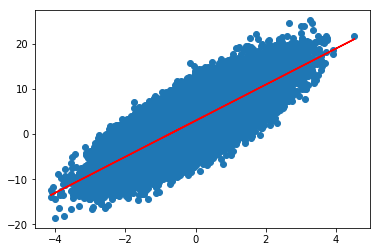

In [6]:
gradient_show(x,y,theta)

## 随机梯度下降法

### $\bigtriangledown J(\theta) = 2 \cdot (X_b^{(i)})^T \cdot (X_b^{(i)} \theta - y^{(i)})$

### 学习率 $\eta = \frac{1}{i\_iters} $ 前后$\eta$相差值太大， 为缓解改为逐渐递减的 $\frac{a}{i\_iters + b}$（模拟退火的思想）

In [7]:
def dJ_sgd(theta,X_b_i,y_i):  # 计算当前梯度
    return X_b_i.T.dot(X_b_i.dot(theta) - y_i) * 2

In [8]:
def sgd(X_b,y,initial_theta,n_iters):
    t0 = 4
    t1 = 50
    
    def learning_rate(t):
        return t0 / (t + t1)
    
    theta = initial_theta
    for cur_iter in range(n_iters):
        rand_i = np.random.randint(len(X_b)) # 随机取数
        gradient = dJ_sgd(theta,X_b[rand_i],y[rand_i])  # 计算当前梯度
        theta = theta - learning_rate(cur_iter) * gradient # 切换theta
    return theta

In [9]:
%%time
X_b = np.hstack([np.ones((len(X),1)),X])
initial_theta = np.zeros(X_b.shape[1]) # 初始化全0向量
theta = sgd(X_b,y,initial_theta,n_iters = len(X_b) // 3)

Wall time: 394 ms


In [10]:
theta

array([2.94336874, 4.00147558])

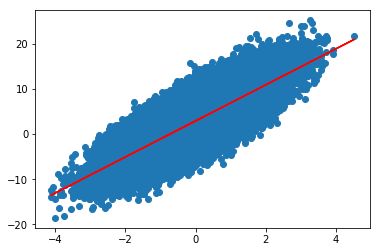

In [11]:
gradient_show(x,y,theta)

## 使用我们自己的 Stochastic Gradient Decent

In [12]:
from LinearRegression import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit_sgd(X,y,n_iters=2)

LinearRegression()

In [13]:
lin_reg.coef_ # 线性回归的斜率

array([4.00473367])

In [14]:
lin_reg.interception_ # 线性回归的截距

2.9899375987862995

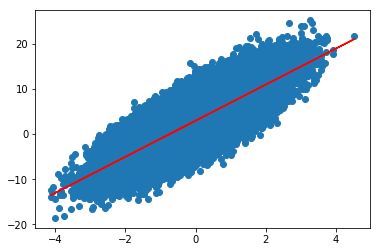

In [16]:
plt.scatter(x,y)
plt.plot(x,lin_reg.coef_[0] * x + lin_reg.interception_,color='r')
plt.show()

## 真实使用我们自己的Stochastic Gradient Decent

In [17]:
from sklearn import datasets

boston = datasets.load_boston() # 加载波士顿房价数据

In [18]:
X = boston.data
y = boston.target

X = X[y < 50.0]
y = y[y < 50.0]

In [19]:
from model_selection import train_test_split
X_train_standard = standardScaler.transform(X_train)

In [21]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(X_train)  # 对数据归一化处理
X_train_standard = standardScaler.transform(X_train)
X_test_standard = standardScaler.transform(X_test)

In [23]:
from LinearRegression import LinearRegression

lin_reg = LinearRegression() # 实例化线性模型
%time lin_reg.fit_sgd(X_train_standard,y_train,n_iters=2)  # 随机梯度下降法
lin_reg.score(X_test_standard,y_test) # 输出对应R方值

Wall time: 6.99 ms


0.8080128586660886

In [24]:
%time lin_reg.fit_sgd(X_train_standard,y_train,n_iters=50)  # 随机梯度下降法
lin_reg.score(X_test_standard,y_test) # 输出对应R方值

Wall time: 152 ms


0.8130643532290588

In [31]:
%time lin_reg.fit_sgd(X_train_standard,y_train,n_iters=100)  # 随机梯度下降法
lin_reg.score(X_test_standard,y_test) # 输出对应R方值

Wall time: 341 ms


0.813104747286574

In [32]:
lin_reg.coef_

array([-1.01705904,  0.81084651, -0.29197153,  0.01944167, -1.34407298,
        2.25322101, -0.66852088, -2.53374252,  2.12240641, -2.19840845,
       -1.76512711,  0.71858765, -2.73232412])

In [33]:
lin_reg.interception_

21.501478362251227

In [35]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [36]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [37]:
X.shape

(490, 13)

In [43]:
X[1:]

array([[2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, ..., 1.8700e+01, 3.9463e+02,
        2.9400e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [38]:
y.shape

(490,)

### scikit-learn中的SGD

In [26]:
from sklearn.linear_model import SGDRegressor

In [29]:
sgd_reg = SGDRegressor(n_iter=5)
sgd_reg.fit(X_train_standard,y_train)
sgd_reg.score(X_test_standard,y_test)

0.804666101433287

In [28]:
sgd_reg = SGDRegressor(n_iter=100)b
sgd_reg.fit(X_train_standard,y_train)
sgd_reg.score(X_test_standard,y_test)

0.8132804060803719